# Final Assessment for M507(Methods of Prediction) Group c

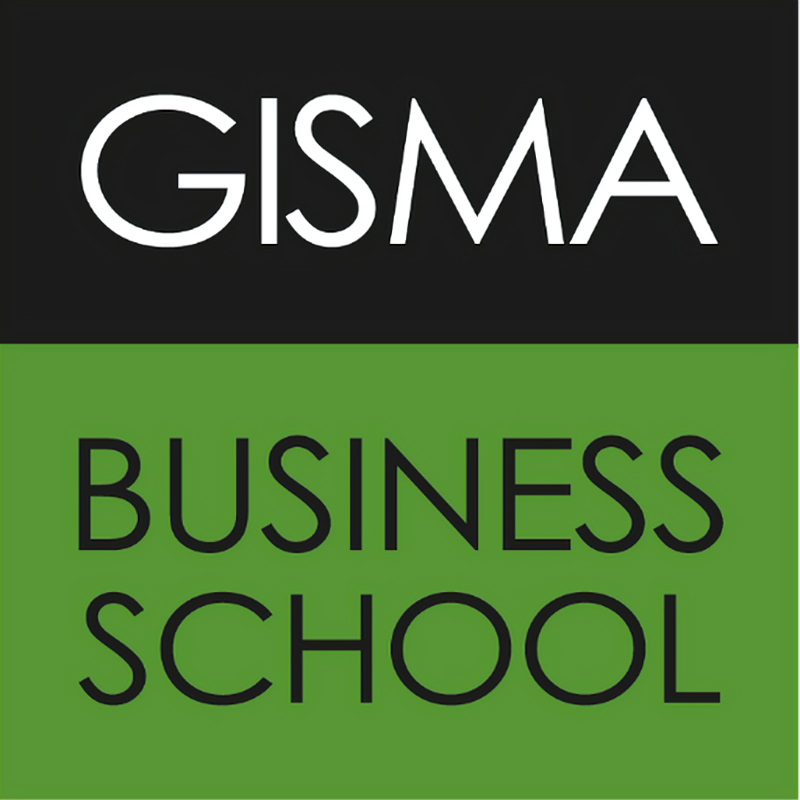

In [1]:
from IPython.display import Image
Image("GISMA_LOGO.png",width = 200, height = 200)

### Predicting Anamoly in Credit Card Transactions

## Table of the Content

### 1) Introduction

### 2) Problem Statement

### 3) Methodology & Apporach

### 4) Importing Libraries 

### 5) Importing Dataset

### 6) Data Exploration
##### 6.1) Checking for Missing Values
##### 6.2) Data Visualization

### 7) Data Preprocessing
##### 7.1) Scaling the Data using Standard Scaler

### 8) Train/Test Split

### 9) Model Building
##### 9.1)Random Forest Classifier
##### 9.2) Decision Tree Classifier
##### 9.3) Gradient Boosting Classifier
##### 9.4) SGDClassifier

### 10) Neural Network Models
##### 10.1)Neural Network using Weight Class
##### 10.2) Neural Network using Undersampling Technique
##### 10.3) Neural Network using SMOTE
###### 10.3.1) Testing on Full Data Set Now

### 11) Model Evaluation

### 12) Conclusion and Actionable Insights


# 1) Introduction
I have been hired as a Data Scientist in a Europeon Central bank and my duty is to provide end-to-end solutions related to Data. Nowadays we have seen many kinds of scams in the banking sector and one of the major scam we have noticed is in the Credit Card Transactions.The data that has been provided to me is highly confidential and it contains only numerical values which are result of `PCA` Transformation. The features v1 ,v2 ..... v28 are the result of PCA Transformation and `Time` and `Amount` column is in original condtion to use in prediction. The data we have obtained is based on 284,807 transactions out of which 492 transactions are Fraudulent and these transaction are recorded in September 2013 and these transaction were made by Europeon card holders. As a data scientist now thats my job to make a system and can detect these kind on `Anomalies`.  

- DataSet link (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


# 2)Problem Statement
As I have dicussed above we have the data of credit card transactions which are about 284,807 transactions and around 492 are Fraudulent, so we can see that the data is highly `Imbalanced` and we have to resolve this issue and I have to explore data in detail to find out the correlations in data and to clear out the `Outliers` in data. Due to `Imbalancing` we can not fit data in neural networks so I have make it balanced by using advance balancing techniques and we have to make a system which can detact these anamoly in future with high precision and for that I will use several Algorithms to find out which will work best in this case.

The Major Business question in this task is that:
 - 1) How to deal with Imbalance data ?
 - 2) Which approach will work better in this condtion?
 - 3) What algorithm we should use in this kind of problems?
 

# 3) Methodology and Approach

First thing to notice here is that the data is of Numerical nature and it's seems highly Imbalanced, So First of all I have to do Exploratory Data Analysis to find out the hidden knowledge in data, later on after data findings I will move forward towards data preprocessing and cleansing if it will be needed. Once my data will be cleaned I will have to scale it and later on I have to make the data balance to feed into the Machine Learning models. Once I will get the results for different model then I will do model evaluation and then I can concluded what can be done in future to overcome such problems and how we can improve more.

# 4) Importing Libraries 

In [2]:
import pandas as pd
import numpy as np

# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout

import keras
from keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import itertools

import sklearn.model_selection
import sklearn.metrics 

import sklearn.neighbors

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette() 
%matplotlib inline 

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8




# 5) Importing Dataset

In [3]:
CC_data = pd.read_csv('data/creditcard.csv')

CC_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 6) Data Exploration

In [4]:
CC_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- Here we can that we have 31 columns and in this dataset which contains 284,807 transactions(rows)

In [5]:
CC_data.shape

(284807, 31)

In [6]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 6.1) Checking for Missing Values 

In [7]:
CC_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
print(CC_data.shape)
print(CC_data["Class"].value_counts())

(284807, 31)
0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

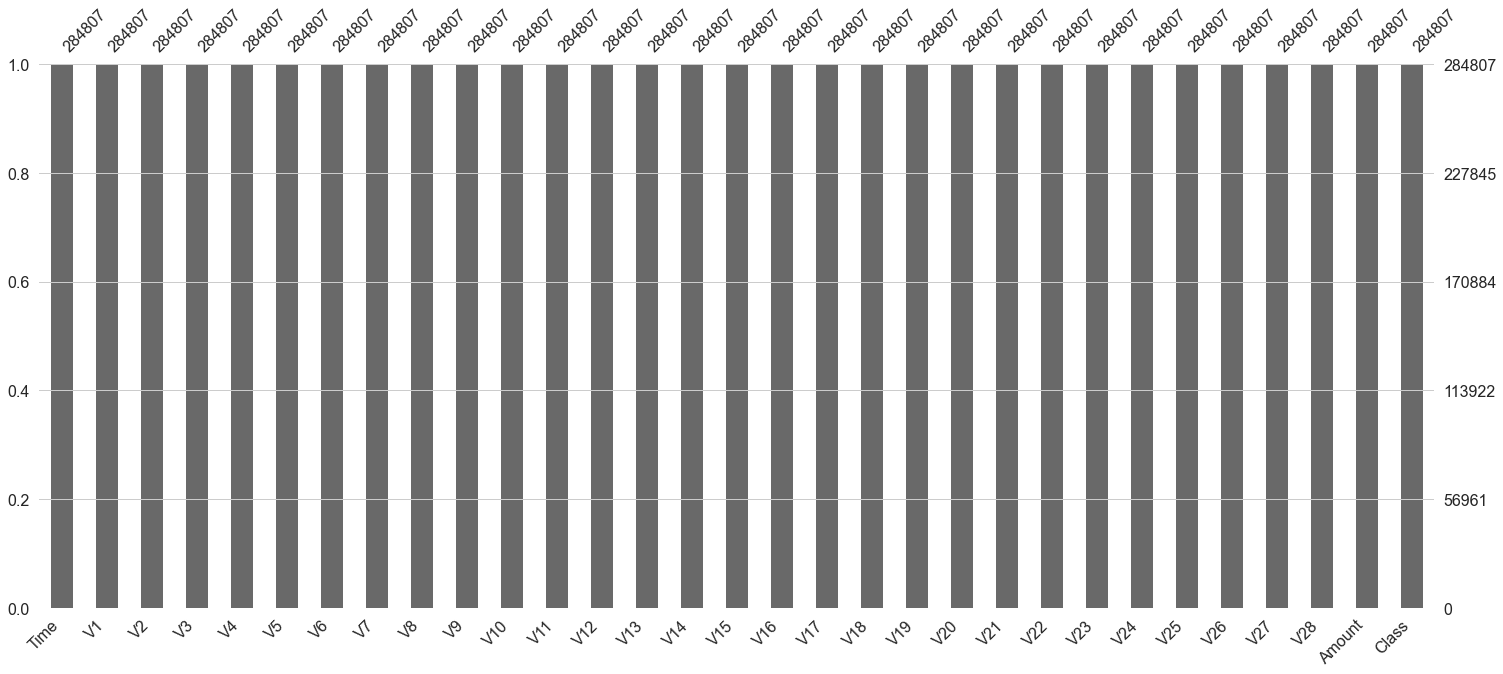

In [9]:
msno.bar(CC_data)

- By Plotting the values of the data frame we can see there is no null values in the data.

## 6.2) Data Visualization

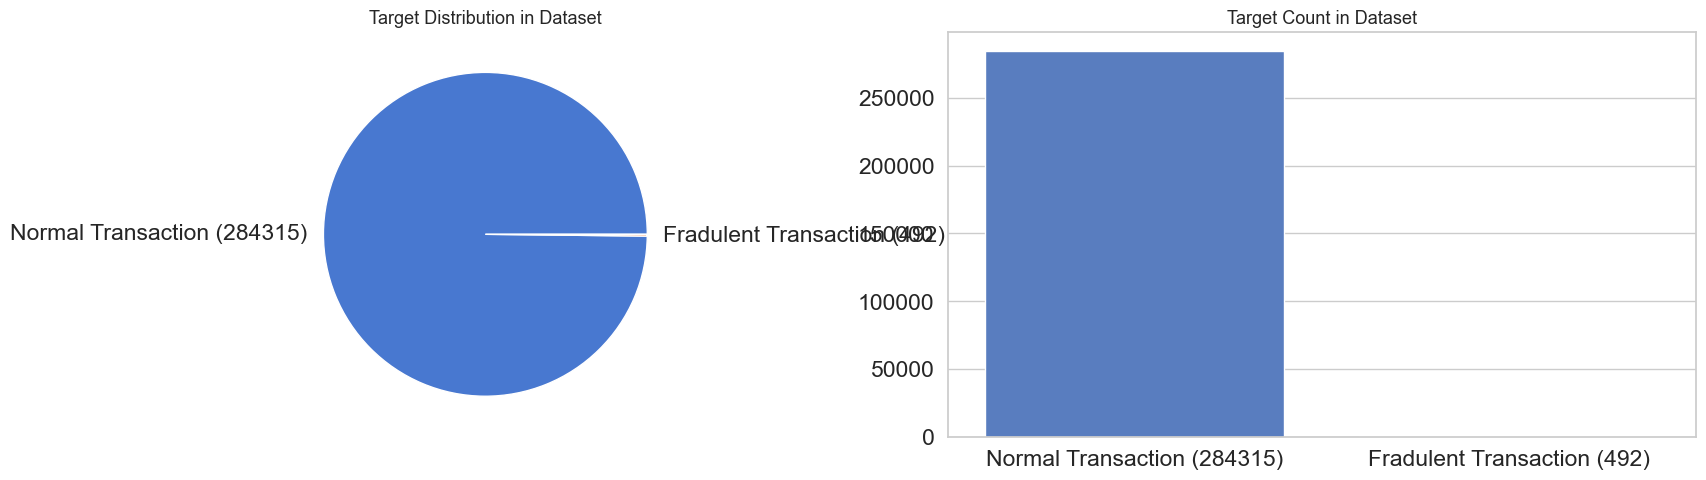

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

CC_data["Class"].value_counts().plot(kind='pie', ax=axes[0], labels=['Normal Transaction (284315)', 'Fradulent Transaction (492)'])
temp = CC_data["Class"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Normal Transaction (284315)", "Fradulent Transaction (492)"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

- Data visualization states that there are 284,315 transactions that are normal and 492 are of Fraudulent type, It's clear that data is highly Imbalanced and we have to take care of that in future before feeding the data in ML Models

In [11]:
fraud_trans = CC_data[CC_data.Class == 1]
normal_trans = CC_data[CC_data.Class == 0]

In [12]:
fraud_trans.shape

(492, 31)

In [13]:
normal_trans.shape

(284315, 31)

In [14]:
fraud_trans.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal_trans.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

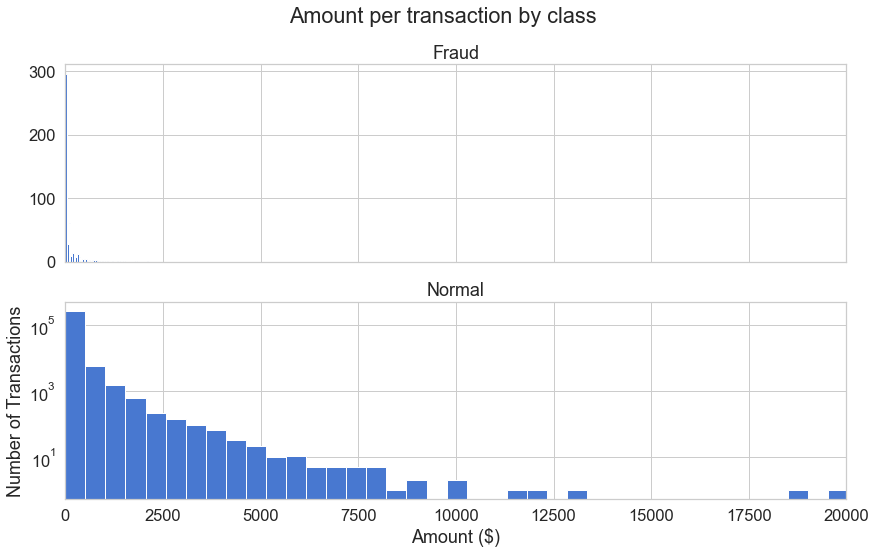

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(fraud_trans.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal_trans.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

- Here we can observe that in most of the fraud transactions the amount spent in around `300 dollars`  and in Normal transactions it can may vary between 1 dollar to 10000 and there are some outliers as well. 

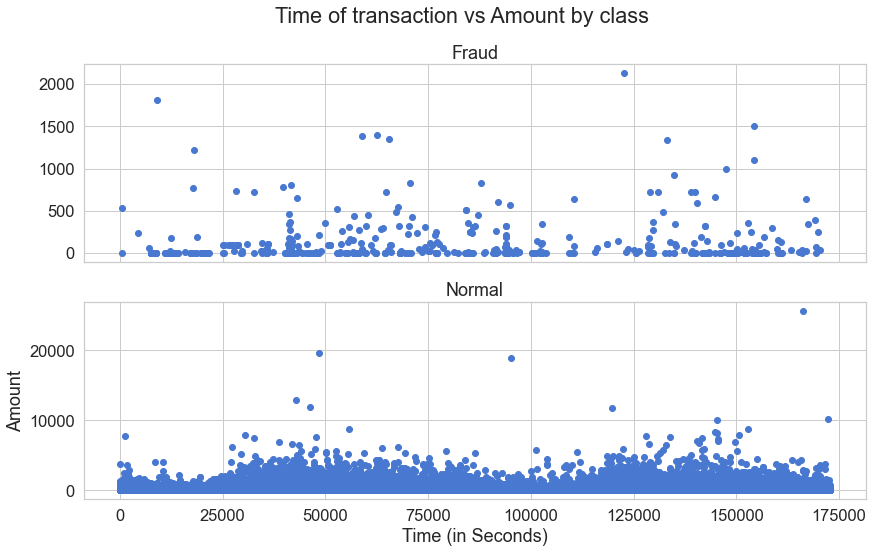

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud_trans.Time, fraud_trans.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal_trans.Time, normal_trans.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

- As we can see that there are numbers of transactions which were held at same time so it's hard to state that what time the fradulent transactions were made, although we can see that there are some outliers in both so we have figure them out.

- One thing to `note` here is that time doesn't really matter to detect the fraudulent transactions.

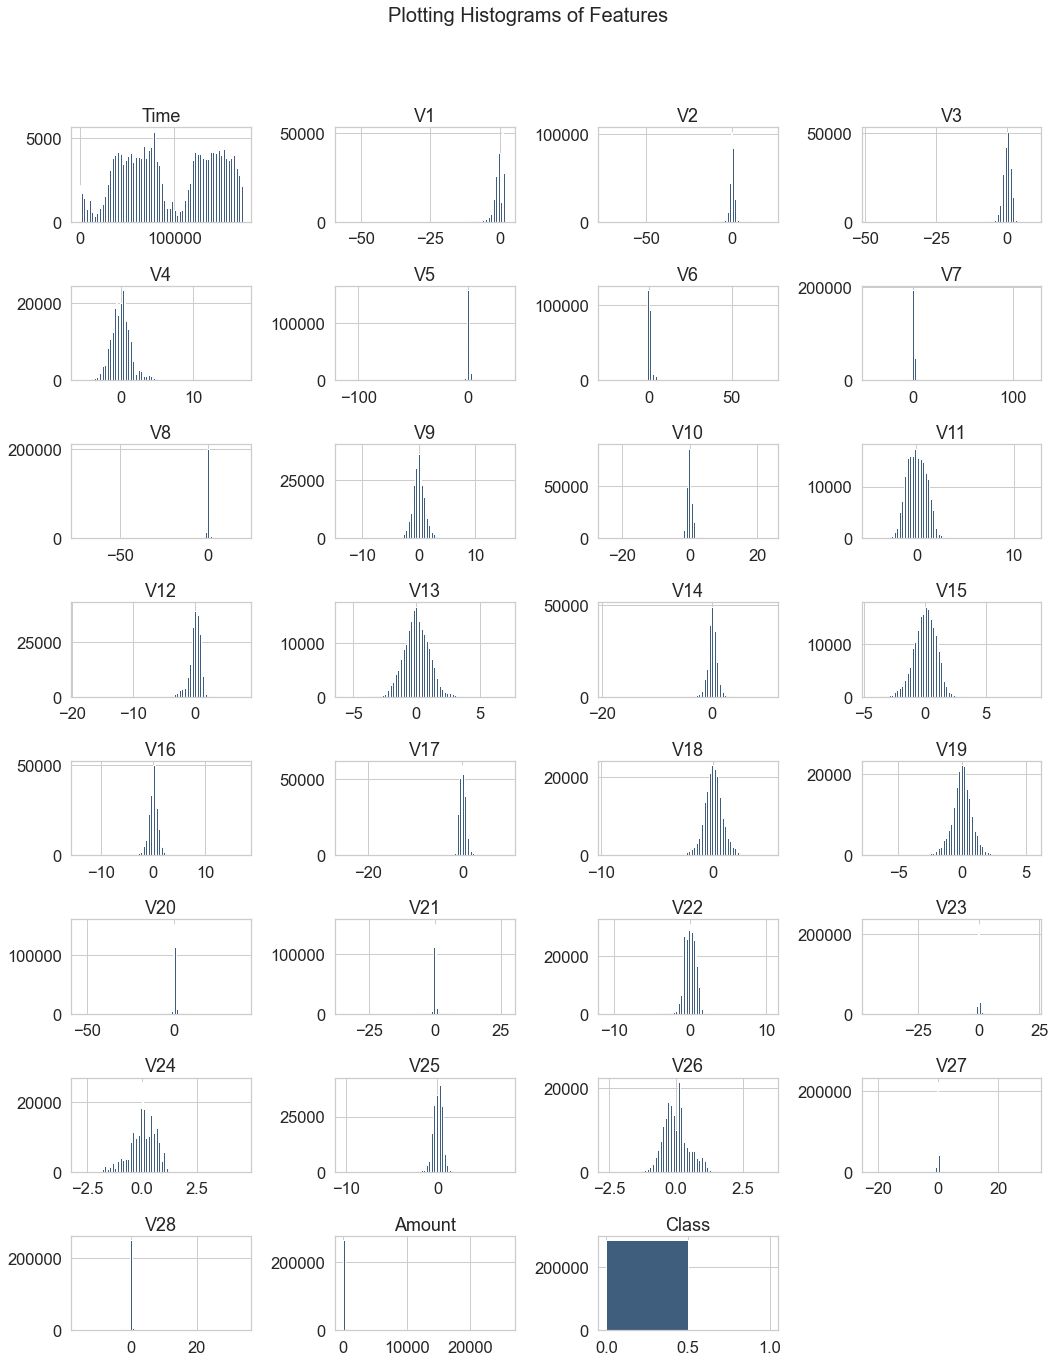

In [18]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Plotting Histograms of Features', fontsize=20)
for i in range(CC_data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(CC_data.columns.values[i])

    vals = np.size(CC_data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                  
    
    plt.hist(CC_data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- Here we can observe that most of the data is of Class `0` `(Non-Fraudulent)` and very Minor data is right Skewed.

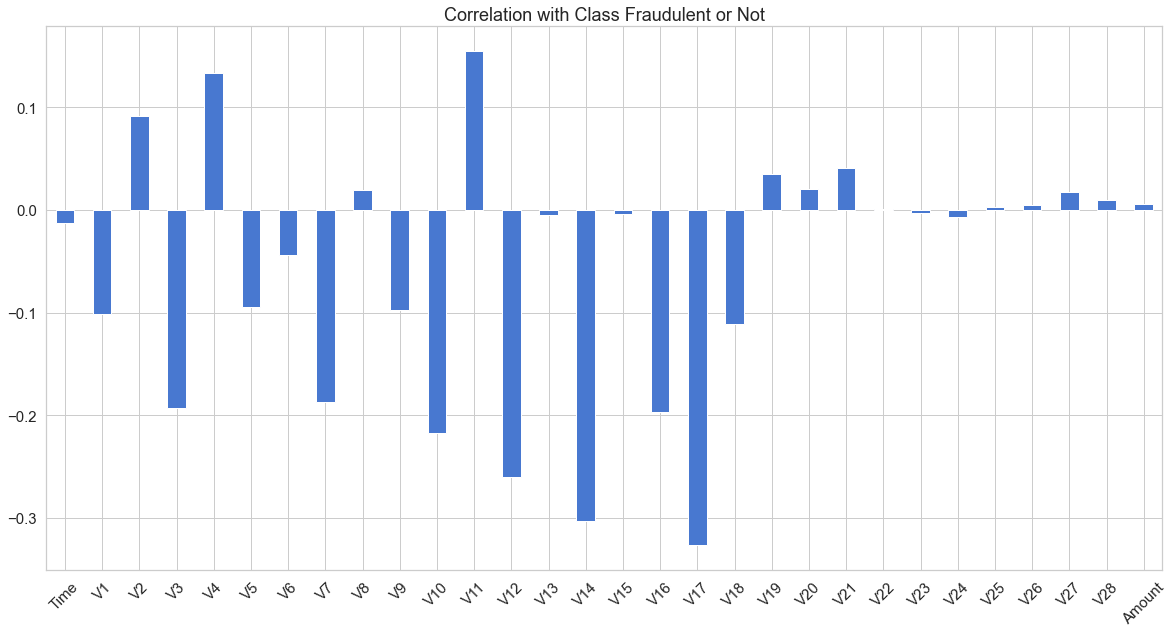

In [19]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
CC_df = CC_data.drop(columns = ['Class'])   # drop non numerical columns
CC_df.corrwith(CC_data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

# 7) Data Preprocessing

## 7.1) Scaling the Data using Standard Scaler

In [20]:



CC_data['Amount_normalized'] = StandardScaler().fit_transform(CC_data['Amount'].values.reshape(-1,1)) 
CC_data = CC_data.drop(['Amount'],axis=1)

- I have used `Standard Scaler` here to normalizie the Amount column after finding that we need to normalize it as every other columns is already normalizied.

In [21]:
CC_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_normalized
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [22]:
CC_data = CC_data.drop(['Time'],axis=1)
CC_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_normalized
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


- Here I have dropped the `Time` column as it is not relevent to our prediction.

In [23]:
X = CC_data.iloc[:, CC_data.columns != 'Class']
y = CC_data.iloc[:, CC_data.columns == 'Class']  # Response variable determining if fraudulent or not

In [24]:

y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [25]:
X.shape

(284807, 29)

In [26]:
y.shape

(284807, 1)

-  Here we can see that our data is in shape after scaling to feed into Machine Learning Model.

# 8) Train/Test Split

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)

In [28]:
X_train.shape

(227845, 29)

In [29]:

X_test.shape

(56962, 29)

- In the above section I have splitted the data into train, test set , I have used 80 percent for training and 20 percent for Testing.

# 9) Model Building

## 9.1)Random Forest Classifier 

In [30]:
%%time
parameters = {
    
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

RF_classifier = RandomForestClassifier()

Grid_Sr = RandomizedSearchCV(estimator = RF_classifier, param_distributions = parameters, n_iter = 10, cv = 3,n_jobs = -1)
Grid_Sr.fit(X_train,y_train.values.ravel())

CPU times: total: 29.2 s
Wall time: 2min 6s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'log2'],
                                        'max_leaf_nodes': range(2, 10),
                                        'n_estimators': range(10, 100, 10)})

In [31]:
Grid_Sr.best_params_

{'n_estimators': 40,
 'max_leaf_nodes': 8,
 'max_features': 'auto',
 'criterion': 'entropy'}

- Here I have used `RandomizedSearchCV` to get the best parameters to feed into `Random Forest Classifier` and as we can see we have got the best parameters which i will be using now  

In [32]:
ran_for = RandomForestClassifier(**Grid_Sr.best_params_)

ran_for.fit(X_train,y_train.values.ravel())    

RandomForestClassifier(criterion='entropy', max_features='auto',
                       max_leaf_nodes=8, n_estimators=40)

In [33]:
y_predict = ran_for.predict(X_test)

In [34]:
ran_for.score(X_test,y_test)

0.9995084442259752

In [35]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9995 	precision:0.9125 	recall:0.7766 	F1-score:0.8391


- We can see that we got a very good `Train` and `Test` accuracy here using `RandomizedSearch` for `RandomForestClassifier`

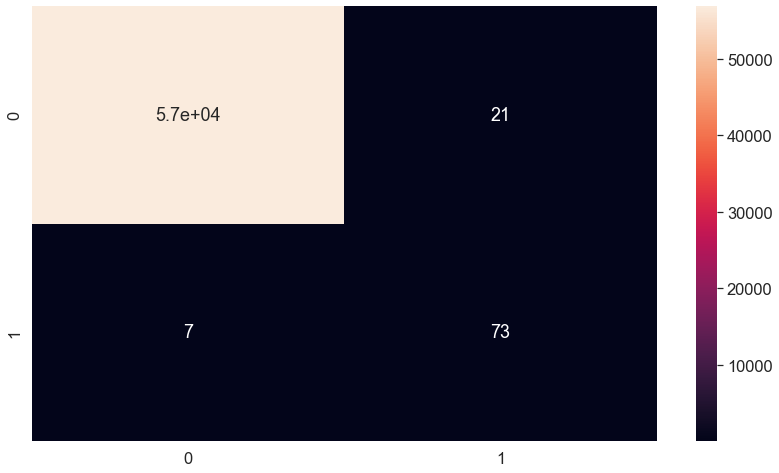

In [36]:
con_max = confusion_matrix(y_predict, y_test)
sns.heatmap(con_max, annot=True);

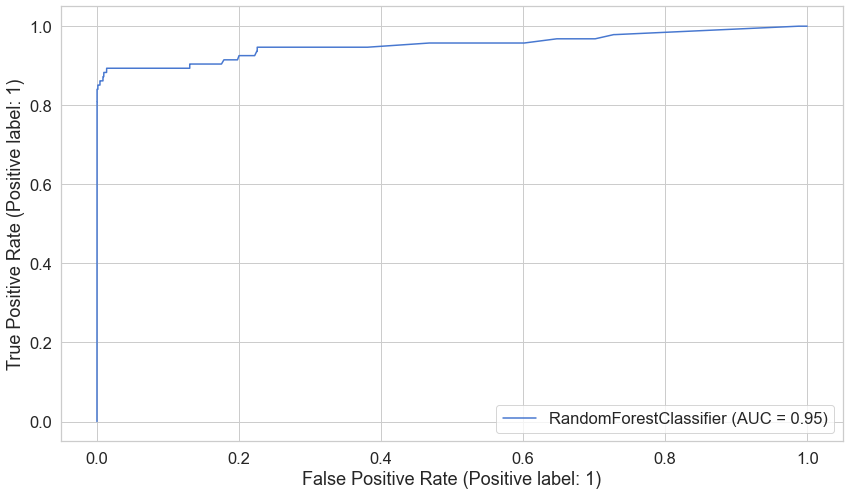

In [37]:
ROC_RF = plot_roc_curve(ran_for, X_test, y_test)
plt.show()

In [38]:
### Store results in dataframe for comparing various Models
Testing_result = pd.DataFrame([['RandomForest', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.9125,0.83908


- I am appending the result of the model to in a data frame to use later for `Model Evaluation`

## 9.2) Decision Tree Classifier 

In [39]:
%%time
dec_tree = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
dec_tree.fit(X_train,y_train.values.ravel())

CPU times: total: 2.92 s
Wall time: 2.93 s


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

- Now I have used `Decision Tree Classifier` with some random parameters to feed into model (here I haven't used `GridSearch` or `RandomizedSearch` as it is time taking process) 

In [40]:
y_predicted = dec_tree.predict(X_test)
dec_tree.score(X_test,y_test)

0.999420666409185

In [41]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9994 	precision:0.8765 	recall:0.7553 	F1-score:0.8114


- Even though I selected the parameters randomly but still we got a very good `train/test` accuracy which is a good sign.

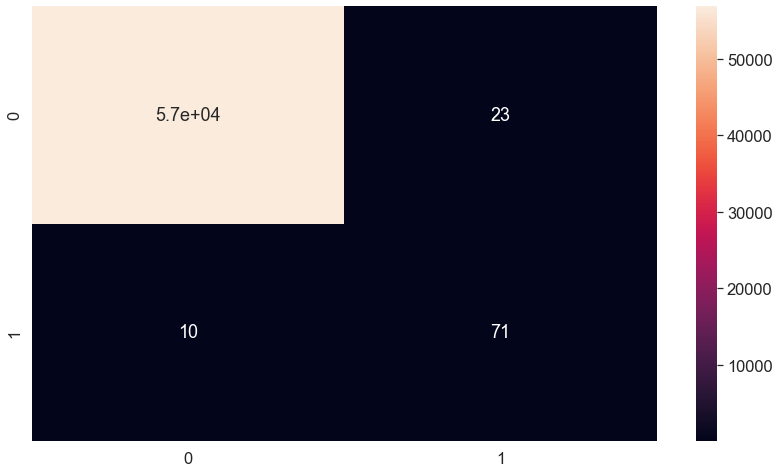

In [42]:
con_max = confusion_matrix(y_predicted, y_test)
sns.heatmap(con_max, annot=True);

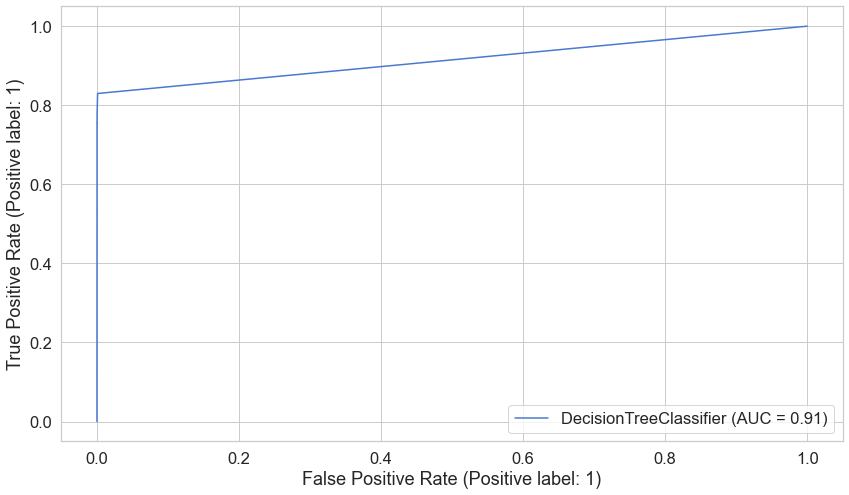

In [43]:
ROC_DT = plot_roc_curve(dec_tree, X_test, y_test)
plt.show()

In [44]:
Mod_result = pd.DataFrame([['DecisionTree', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
Testing_result = Testing_result.append(Mod_result, ignore_index = True)
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.912500,0.839080
1,DecisionTree,0.999421,0.244681,0.755319,0.876543,0.811429


## 9.3) Gradient Boosting Classifier

In [45]:
%%time


grad_Boost_params ={
    'n_estimators': 100,
    'max_features': 0.9,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

CPU times: total: 0 ns
Wall time: 0 ns


In [46]:
grad_boost = GradientBoostingClassifier(**grad_Boost_params)
# GS.fit(X_train,y_train.values.ravel())
grad_boost.fit(X_train,y_train.values.ravel())

GradientBoostingClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2)

In [47]:
y_predicted = grad_boost.predict(X_test)

In [48]:
grad_boost.score(X_test,y_test)

0.9994382219725431

In [49]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9994 	precision:0.8780 	recall:0.7660 	F1-score:0.8182


- I have defined `Gradient Boosting Classifier` with grid of parameters to select and we have seen very good result which is almost 100 percent 

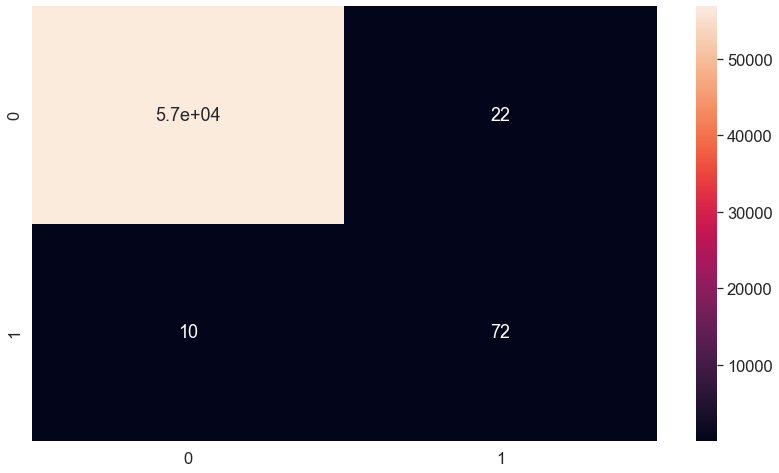

In [50]:
con_max = confusion_matrix(y_predicted, y_test)
sns.heatmap(con_max, annot=True);

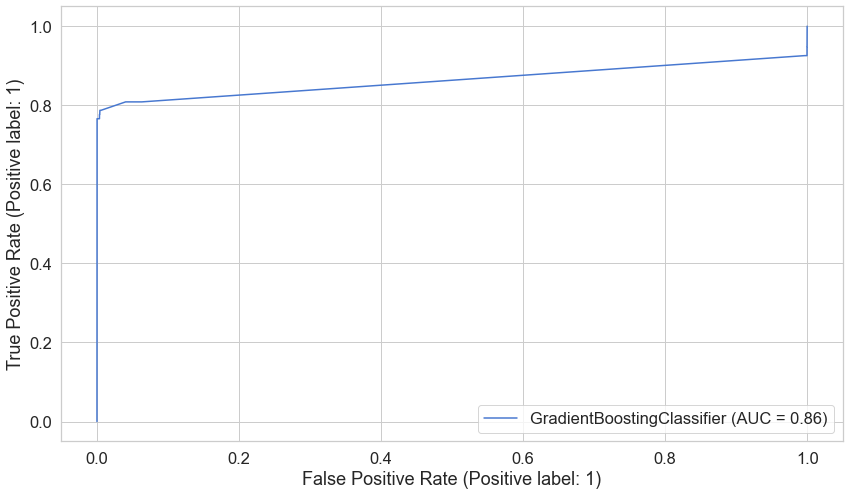

In [51]:
ROC_RF = plot_roc_curve(grad_boost, X_test, y_test)
plt.show()

In [52]:
Mod_result = pd.DataFrame([['Grad_Boost', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
Testing_result = Testing_result.append(Mod_result, ignore_index = True)
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.912500,0.839080
1,DecisionTree,0.999421,0.244681,0.755319,0.876543,0.811429
2,Grad_Boost,0.999438,0.234043,0.765957,0.878049,0.818182


## 9.4) SGDClassifier

In [53]:
%%time
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(penalty="l2", random_state=0, max_iter=1000)
sgd_clf.fit(X_train,y_train.values.ravel())

CPU times: total: 562 ms
Wall time: 560 ms


SGDClassifier(random_state=0)

In [54]:
y_pred = grad_boost.predict(X_test)

In [55]:
sgd_clf.score(X_test,y_test)

0.9992099996488887

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9994 	precision:0.8780 	recall:0.7660 	F1-score:0.8182


- Here I have used `Stochastic Gradient Descent (SGD) Classifier`  and the is nearly same as `Gradient Boosting Classifier`

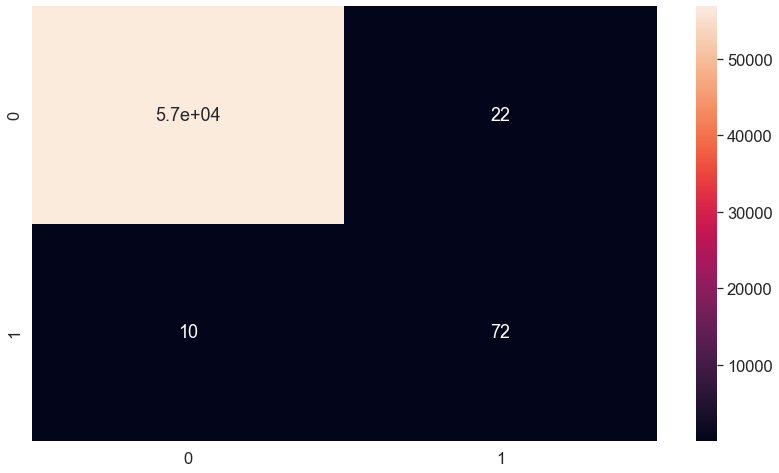

In [57]:
con_max = confusion_matrix(y_pred, y_test)
sns.heatmap(con_max, annot=True);

In [58]:
Mod_result = pd.DataFrame([['SGD_Classifier', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
Testing_result = Testing_result.append(Mod_result, ignore_index = True)
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.912500,0.839080
1,DecisionTree,0.999421,0.244681,0.755319,0.876543,0.811429
2,Grad_Boost,0.999438,0.234043,0.765957,0.878049,0.818182
3,SGD_Classifier,0.999438,0.234043,0.765957,0.878049,0.818182


# 10) Neural Network Models

 Now on I will be working with `Neural Networks` I have defined the model using `Keras Sequential API` with `Dense Layers` and I have used `Drop out` function as well and the activation function which I used are `Relu` & `Sigmoid`.

In [59]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


- Here the `Input_dim` is 29 as our features are also 29.

In [60]:
%%time
model_NN1 = Sequential()
model_NN1.add(layers.Dense(16,input_dim = 29,activation='relu') )
model_NN1.add(layers.Dense(units=24,activation='relu')),
model_NN1.add(Dropout(0.3))
model_NN1.add(layers.Dense(24, activation='relu'))
model_NN1.add(layers.Dense(24, activation='relu'))
model_NN1.add(layers.Dense(1, activation='sigmoid'))
model_NN1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_NN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainabl

In [61]:
%%time
model_NN1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_NN1.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
15190/15190 [==============================] - 131s 9ms/step - loss: 0.0073 - accuracy: 0.9991
Epoch 2/5
15190/15190 [==============================] - 132s 9ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/5
15190/15190 [==============================] - 132s 9ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
15190/15190 [==============================] - 133s 9ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 5/5
15190/15190 [==============================] - 133s 9ms/step - loss: 0.0036 - accuracy: 0.9993
CPU times: total: 14min 30s
Wall time: 11min 1s


In [62]:
score = model_NN1.evaluate(X_test, y_test)

1781/1781 [==============================] - 10s 5ms/step - loss: 0.0039 - accuracy: 0.9995


In [63]:
print(score)

[0.003913349937647581, 0.9995084404945374]


1781/1781 [==============================] - 5s 3ms/step
Test Data Accuracy: 0.9995


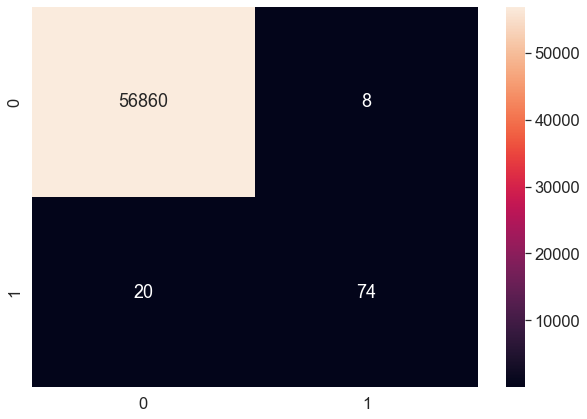

In [64]:


y_pred = model_NN1.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))

sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [65]:

y_pred = model_NN1.predict(X_test)
y_test = pd.DataFrame(y_test)    

1781/1781 [==============================] - 5s 3ms/step


In [66]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())   

In [67]:
print(cnf_matrix)

[[56860     8]
 [   20    74]]


<AxesSubplot:>

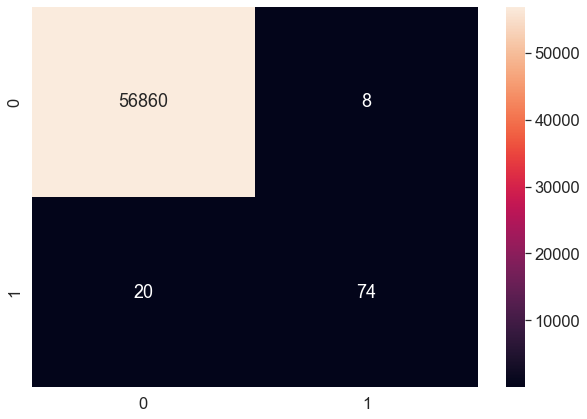

In [68]:
cm = confusion_matrix(y_test, y_pred.round()) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))


sns.heatmap(df_cm, annot=True, fmt='g')

In [69]:
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9995 	precision:0.9024 	recall:0.7872 	F1-score:0.8409


 - Here We have used multiple dense layer in the `Sequential API Neural Network` and we have seen a very good `Accuracy Score` and `Precision`

In [70]:
Mod_result = pd.DataFrame([['PlainNeuralNetwork', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
Testing_result = Testing_result.append(Mod_result, ignore_index = True)
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.912500,0.839080
1,DecisionTree,0.999421,0.244681,0.755319,0.876543,0.811429
2,Grad_Boost,0.999438,0.234043,0.765957,0.878049,0.818182
3,SGD_Classifier,0.999438,0.234043,0.765957,0.878049,0.818182
4,PlainNeuralNetwork,0.999508,0.212766,0.787234,0.902439,0.840909


- As the  data is `Imbalanced` here i am adding `Weight_class` to adjust the Class Imbalance 

## 10.1)Neural Network using Weight Class

In [71]:
%%time
y = np.array([y_train[i][0] for i in range(len(y_train))])
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y),
                                        y = y                                                  
                                    )
class_weights = dict(zip(np.unique(y), class_weights))
class_weights

CPU times: total: 109 ms
Wall time: 113 ms


{0: 0.5008749291043628, 1: 286.23743718592965}

In [72]:
%%time
model_NN1.fit(X_train,y_train,batch_size=128, epochs=10, class_weight=class_weights, shuffle=True)

Epoch 1/10
1781/1781 [==============================] - 15s 8ms/step - loss: 0.1513 - accuracy: 0.9852
Epoch 2/10
1781/1781 [==============================] - 15s 8ms/step - loss: 0.1024 - accuracy: 0.9815
Epoch 3/10
1781/1781 [==============================] - 15s 8ms/step - loss: 0.0865 - accuracy: 0.9764
Epoch 4/10
1781/1781 [==============================] - 15s 9ms/step - loss: 0.0712 - accuracy: 0.9768
Epoch 5/10
1781/1781 [==============================] - 15s 8ms/step - loss: 0.0735 - accuracy: 0.9762
Epoch 6/10
1781/1781 [==============================] - 15s 8ms/step - loss: 0.0741 - accuracy: 0.9791
Epoch 7/10
1781/1781 [==============================] - 15s 8ms/step - loss: 0.0888 - accuracy: 0.9772
Epoch 8/10
1781/1781 [==============================] - 15s 9ms/step - loss: 0.0628 - accuracy: 0.9786
Epoch 9/10
1781/1781 [==============================] - 18s 10ms/step - loss: 0.0571 - accuracy: 0.9778
Epoch 10/10
1781/1781 [==============================] - 16s 9ms/step - 

In [73]:
%%time
weighted_scr = model_NN1.evaluate(X_test, y_test)

1781/1781 [==============================] - 10s 5ms/step - loss: 0.0687 - accuracy: 0.9752
CPU times: total: 13.2 s
Wall time: 9.73 s


1781/1781 [==============================] - 5s 3ms/step
Test set Acc: 0.9752


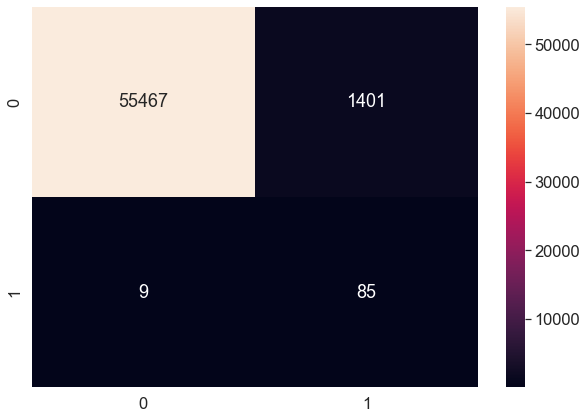

In [74]:

y_pred_nn = model_NN1.predict(X_test)
for i in range(len(y_test)):
    if y_pred_nn[i]>0.5:
        y_pred_nn[i]=1 
    else:
        y_pred_nn[i]=0
        
con_max = confusion_matrix(y_test, y_pred_nn)
df_con_max = pd.DataFrame(con_max, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))


sns.heatmap(df_con_max, annot=True, fmt='g')
print("Test set Acc: %0.4f" % accuracy_score(y_test, y_pred_nn))

In [75]:
accuracy = accuracy_score(y_test, y_pred_nn.round())
precision = precision_score(y_test, y_pred_nn.round())
recall = recall_score(y_test, y_pred_nn.round())
f1 = f1_score(y_test, y_pred_nn.round())

print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9752 	precision:0.0572 	recall:0.9043 	F1-score:0.1076


- The thing here to notice is that we have very much improved in Detecting the `Fradulent Transactions` but our `Accuracy` is decreased we have very law rate of False Negative which is most important criteria to classify the `Fradulent Transaction`. On other hand we have seen that the false positive score is increased which means it will misclassify the normal transactions.

In [76]:
Mod_result = pd.DataFrame([['WeightedNeuralNetwork', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

Testing_result = Testing_result.append(Mod_result, ignore_index = True)
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.912500,0.839080
1,DecisionTree,0.999421,0.244681,0.755319,0.876543,0.811429
2,Grad_Boost,0.999438,0.234043,0.765957,0.878049,0.818182
3,SGD_Classifier,0.999438,0.234043,0.765957,0.878049,0.818182
4,PlainNeuralNetwork,0.999508,0.212766,0.787234,0.902439,0.840909
5,WeightedNeuralNetwork,0.975247,0.095745,0.904255,0.057201,0.107595


## 10.2) Neural Network using Undersampling Technique

This is one more approach to balance the train set , using this undersampling technique will help us to randomly pick the Normal and fradulent transactions from the data set.

In [77]:
fraud_transactions = np.array(CC_data[CC_data.Class == 1].index)
fraud_trans_numbers = len(fraud_transactions)
print(fraud_trans_numbers)

492


In [78]:
non_fraudlent_trans = CC_data[CC_data.Class == 0].index

len(non_fraudlent_trans)

284315

In [79]:

Ran_non_fraudlent_trans = np.random.choice(non_fraudlent_trans, fraud_trans_numbers, replace=False)
Ran_non_fraudlent_trans = np.array(Ran_non_fraudlent_trans)
print(len(Ran_non_fraudlent_trans))

492


In [80]:
trans_underSample = np.concatenate([fraud_transactions,Ran_non_fraudlent_trans])
print(len(trans_underSample))

984


In [81]:
df_underSample = CC_data.iloc[trans_underSample,:]

In [82]:
X_under_Sample = df_underSample.iloc[:,df_underSample.columns != 'Class']
y_under_Sample = df_underSample.iloc[:,df_underSample.columns == 'Class']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_under_Sample,y_under_Sample, test_size=0.3)

In [84]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [85]:
X_train.shape


(688, 29)

In [86]:
X_test.shape

(296, 29)

In [87]:
model_NN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainabl

- I am using the same neural network again after undersampling 

In [88]:
%%time
model_NN1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model_NN1.fit(X_train,y_train, batch_size=128 , epochs=10)

Epoch 1/10
6/6 [==============================] - 1s 11ms/step - loss: 0.0943 - accuracy: 0.9724
Epoch 2/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0855 - accuracy: 0.9826
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0885 - accuracy: 0.9811
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0803 - accuracy: 0.9767
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0679 - accuracy: 0.9826
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0677 - accuracy: 0.9840
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0646 - accuracy: 0.9840
Epoch 8/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0693 - accuracy: 0.9811
Epoch 9/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0592 - accuracy: 0.9840
Epoch 10/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0640 - accuracy: 0.9840
CPU times: total: 1.59 s
Wall 

10/10 [==============================] - 0s 4ms/step
Test set Acc: 0.9595


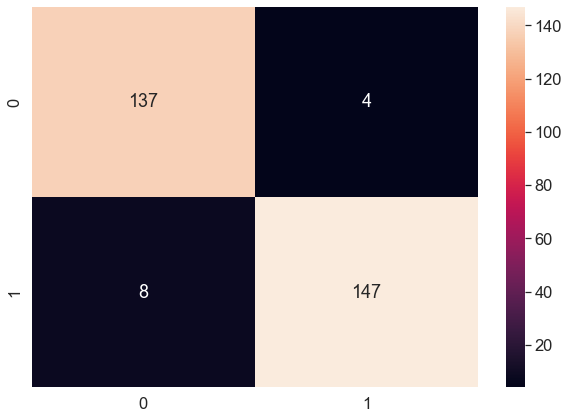

In [89]:


y_pred_u = model_NN1.predict(X_test)
for i in range(len(y_test)):
    if y_pred_u[i]>0.5:
        y_pred_u[i]=1 
    else:
        y_pred_u[i]=0
        
con_max = confusion_matrix(y_test, y_pred_u) # rows = truth, cols = prediction
df_con_max = pd.DataFrame(con_max, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))


sns.heatmap(df_con_max, annot=True, fmt='g')
print("Test set Acc: %0.4f" % accuracy_score(y_test, y_pred_u))

- This model seems to be pretty acurrate on test set.

In [90]:
accuracy = accuracy_score(y_test, y_pred_u.round())
precision = precision_score(y_test, y_pred_u.round())
recall = recall_score(y_test, y_pred_u.round())
f1 = f1_score(y_test, y_pred_u.round())

print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9595 	precision:0.9735 	recall:0.9484 	F1-score:0.9608


In [91]:
Mod_result = pd.DataFrame([['UnderSampledNeuralNetwork', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

Testing_result = Testing_result.append(Mod_result, ignore_index = True)
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.912500,0.839080
1,DecisionTree,0.999421,0.244681,0.755319,0.876543,0.811429
2,Grad_Boost,0.999438,0.234043,0.765957,0.878049,0.818182
3,SGD_Classifier,0.999438,0.234043,0.765957,0.878049,0.818182
4,PlainNeuralNetwork,0.999508,0.212766,0.787234,0.902439,0.840909
5,WeightedNeuralNetwork,0.975247,0.095745,0.904255,0.057201,0.107595
6,UnderSampledNeuralNetwork,0.959459,0.051613,0.948387,0.973510,0.960784


## 10.3) Neural Network using SMOTE

* As I have use undersampling before SMOTE `(Synthetic Minority Oversample Technique)` is opposite of undersampling it upsample the minority class to same level of Majority Class
* The SMOTE generates a new Vector between two 2 existing class. This will increase the `Fraudulent class`.

In [92]:
X = CC_data.iloc[:, CC_data.columns != 'Class']
y = CC_data.iloc[:, CC_data.columns == 'Class']

In [93]:
print(X.shape)
print(y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(284807, 29)
(284807, 1)


In [94]:
oversample = SMOTE()
X_resam, y_resam = oversample.fit_resample(X, y.values.ravel())

In [95]:
y_resam

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [96]:
print('Total no of transactions before applying SMOTE: ', len(y), '...after SMOTE : ', len(y_resam))
print('Total no of transactions before applying SMOTE: ', len(y[y.Class==1]), 
      '...after SMOTE : ', np.sum(y_resam[y_resam==1]))

Total no of transactions before applying SMOTE:  284807 ...after SMOTE :  568630
Total no of transactions before applying SMOTE:  492 ...after SMOTE :  284315


In [97]:
y_resamp = pd.DataFrame(y_resam)
X_resamp = pd.DataFrame(X_resam)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_resamp,y_resamp,test_size=0.2)

In [99]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [100]:
%%time
model_NN2 = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        
])

CPU times: total: 46.9 ms
Wall time: 47.9 ms


In [101]:
%%time
model_NN2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_NN2.fit(X_train, y_train, batch_size= 128, epochs=5 )

Epoch 1/5
3554/3554 [==============================] - 33s 9ms/step - loss: 0.0754 - accuracy: 0.9686
Epoch 2/5
3554/3554 [==============================] - 29s 8ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 3/5
3554/3554 [==============================] - 30s 8ms/step - loss: 0.0187 - accuracy: 0.9946
Epoch 4/5
3554/3554 [==============================] - 30s 8ms/step - loss: 0.0150 - accuracy: 0.9959
Epoch 5/5
3554/3554 [==============================] - 30s 8ms/step - loss: 0.0128 - accuracy: 0.9966
CPU times: total: 3min 23s
Wall time: 2min 31s


3554/3554 [==============================] - 11s 3ms/step
Test set Acc: 0.9979


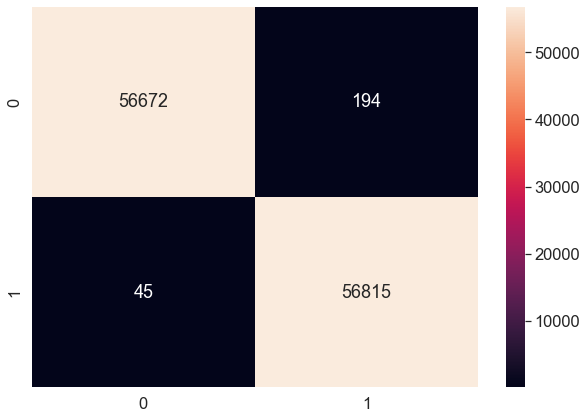

In [102]:

y_predict = model_NN2.predict(X_test)
y_ex = pd.DataFrame(y_test)

for i in range(len(y_ex)):
    if y_predict[i]>0.5:
        y_predict[i]=1 
    else:
        y_predict[i]=0
        
con_max = confusion_matrix(y_ex, y_predict) # rows = truth, cols = prediction
df_con_max = pd.DataFrame(con_max, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))


sns.heatmap(df_con_max, annot=True, fmt='g')
print("Test set Acc: %0.4f" % accuracy_score(y_ex, y_predict))

In [103]:
accuracy = accuracy_score(y_test, y_predict.round())
precision = precision_score(y_test, y_predict.round())
recall = recall_score(y_test, y_predict.round())
f1 = f1_score(y_test, y_predict.round())

print('accuracy:%0.4f'%accuracy,'\tprecision:%0.4f'%precision,'\trecall:%0.4f'%recall,'\tF1-score:%0.4f'%f1)

accuracy:0.9979 	precision:0.9966 	recall:0.9992 	F1-score:0.9979


### 10.3.1) Testing on Full Data Set Now 

8901/8901 [==============================] - 25s 3ms/step
Test set Acc: 0.9970


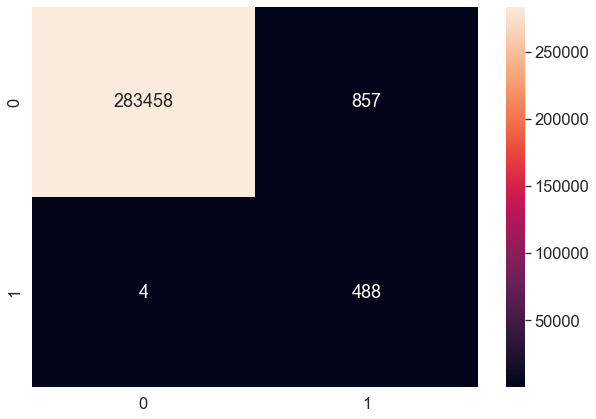

In [104]:
y_predict = model_NN2.predict(X)
y_ex = pd.DataFrame(y)

for i in range(len(y_ex)):
    if y_predict[i]>0.5:
        y_predict[i]=1 
    else:
        y_predict[i]=0
        
con_max = confusion_matrix(y_ex, y_predict) # rows = truth, cols = prediction
df_con_max = pd.DataFrame(con_max, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))


sns.heatmap(df_con_max, annot=True, fmt='g')
print("Test set Acc: %0.4f" % accuracy_score(y_ex, y_predict))

Now we can say that after using `SMOTE` it's clear that our model is predicting very precisely it predicited the `487` out `492` to be fraudulent which is a very good score.

# 11) Model Evaluation

In [105]:
Mod_result = pd.DataFrame([['OverSampledNeuralNetwork', accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

Testing_result = Testing_result.append(Mod_result, ignore_index = True)
Testing_result

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999508,0.223404,0.776596,0.912500,0.839080
1,DecisionTree,0.999421,0.244681,0.755319,0.876543,0.811429
2,Grad_Boost,0.999438,0.234043,0.765957,0.878049,0.818182
3,SGD_Classifier,0.999438,0.234043,0.765957,0.878049,0.818182
4,PlainNeuralNetwork,0.999508,0.212766,0.787234,0.902439,0.840909
5,WeightedNeuralNetwork,0.975247,0.095745,0.904255,0.057201,0.107595
6,UnderSampledNeuralNetwork,0.959459,0.051613,0.948387,0.973510,0.960784
7,OverSampledNeuralNetwork,0.997898,0.000791,0.999209,0.996597,0.997901


# 12) Conclusion and Actionable Insights

While working on this Anomaly detection task which was related to `Credit Card Transaction` we have started with `Exploratory Data Analysis` and we found out that given data was highly Imbalanced, later on I tried to find the correlations between data and found out that `Time` feature was not relevant in `Fraud Detection` so we did some data preparation and done some data scaling later on after scaling I have used multiple classification algorithms and even used `Random Grid Search` and `Ensemble Learning` and then we moved towards `Neural Network` while using that I tried to use both `Over Sampling` and `Undersampling` and `Weight class` technique to fee the data in `Neural Network` so after all of that I have seen that using `SMOTE (Oversampling)` we got the desired results as it was able to caught the most precised amount of `Fraudulent Transaction`

What we can do to improve this pipeline is that the data is very much Imbalance we need more of `Fraudulent Data` to make over pipeline more accurate and we can run some pretrained model as well on this dataset it will may increase the desired result.